## The Titanic Project 

For this project, I want to investigate the unfortunate tragedy of the sinking of the Titanic. The movie "Titanic"- which I watched when I was still a child left a strong memory for me. The event occurred in the early morning of 15 April 1912, when the ship collided with an iceberg, and out of 2,224 passengers, more than 1500 died. 
![Image of Titantic](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/1024px-RMS_Titanic_3.jpg)

The dataset I am working with contains the demographic information, and other information including ticket class, cabin number, fare price of 891 passengers. The main question I am curious about: What are the factors that correlate with the survival outcome of passengers?

### Load the dataset
---
First of all, I want to get an overview of the data and identify whether there is additional data cleaning/wrangling to be done before diving deeper. I start off by reading the CSV file into a Pandas Dataframe.  

In [2]:
#load the libraries that I might need to use
%matplotlib inline
import pandas as pd 
import numpy as np
import csv
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#read the csv file into a pandas dataframe 
titanic_original = pd.DataFrame.from_csv('titanic-data.csv', index_col=None)
titanic_original

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Data Dictionary

#### Variables Definitions
- survival	(Survival	0 = No, 1 = Yes)
- pclass	(Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd)
- sex	(Sex)	
- Age	(Age in years)	
- sibsp	(# of siblings / spouses aboard the Titanic)	
- parch	(# of parents / children aboard the Titanic)	
- ticket	(Ticket number)	
- fare	(Passenger fare price)	
- cabin	(Cabin number)	
- embarked(Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton)

#### Note:
* pclass: A proxy for socio-economic status (SES)
      -1nd = Upper
      -2nd = Middle
      -3rd = Lower

* age: Age is fractional if less than 1.

* sibsp: number of siblings and spouse
      -Sibling = brother, sister, stepbrother, stepsister
      -Spouse = husband, wife (mistresses and fiancés were ignored)

* parch: number of parents and children 
      -Parent = mother, father
      -Child = daughter, son, stepdaughter, stepson 
      -Some children travelled only with a nanny, therefore parch=0 for them.

### Data Cleaning
---
I want to check if there is duplicated data. By using the unique(), I checked the passenger ID to see there is duplicated entries.  

In [3]:
#check if there is duplicated data by checking passenger ID.
len(titanic_original['PassengerId'].unique())

891

Looks like there are no duplicated entries based on passengers ID. We have in total 891 passengers in the dataset. However I have noticed there is a lot of missing values in 'Cabin' feature, and the 'Ticket' feature does not provide useful information for my analysis. I decided to remove them from the dataset by using drop() function

There are also some missing values in the 'Age', I can either removed them or replace them with the mean. Considering there is still a good sample size (>700 entries) after removal, I decide to remove the missing values with dropNa()

In [4]:
#make a copy of dataset
titanic_cleaned=titanic_original.copy()
#remove ticket and cabin feature from dataset
titanic_cleaned=titanic_cleaned.drop(['Ticket','Cabin'], axis=1)
#Remove missing values. 
titanic_cleaned=titanic_cleaned.dropna()
#Check to see if the cleaning is successful
titanic_cleaned.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


Take a look at Survived and Pclass columns. They are not very descriptive, so I decided to add two additional columns called Survival and Class with more descriptive values. 

In [5]:
# Create Survival Label Column
titanic_cleaned['Survival'] = titanic_cleaned.Survived.map({0 : 'Died', 1 : 'Survived'})
titanic_cleaned.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survival
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Died
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Survived
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Survived
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Survived
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Died


In [6]:
# Create Class Label Column
titanic_cleaned['Class'] = titanic_cleaned.Pclass.map({1 : 'Upper Class', 2 : 'Middle Class', 3 : 'Lower Class'})
titanic_cleaned.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survival,Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Died,Lower Class
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Survived,Upper Class
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Survived,Lower Class
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Survived,Upper Class
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Died,Lower Class


### Data overview
---
Now with a clean dataset, I am ready to formulate my hypothesis. I want to get a general overview of statistics for the dataset first. I use the describe() function on the data set. The useful statistic to look at is the mean, which gives us a general idea what the average value is for each feature. The standard deviation provides information on the spread of the data. The min and max give me information regarding whether there are outliers in the dataset. We should be careful and take these outliers into account when analyzing our data. I also calculate the median for each column in case there are outliers. 

In [7]:
#describe() provides a statistical overview of the dataset
titanic_cleaned.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [8]:
#calculate the median for each column
titanic_cleaned.median()

PassengerId    445.00000
Survived         0.00000
Pclass           2.00000
Age             28.00000
SibSp            0.00000
Parch            0.00000
Fare            15.64585
dtype: float64

Looking at the means and medians, we see that the biggest difference is between mean and median of fare price. The mean is 34.57 while the median is only 15.65. It is likely due to the presence of outliers, the wealthy individuals who could afford the best suits. For example, the highest price fare is well over 500 dollars. I also see that the lowest fare price is 0, I suspect that those are the ship crews. 

Now let's study the distribution of variables of interest. The countplot() from seaborn library plots a barplot that shows the counts of the variables. Let's take a look at our dependent variable - "Survived"

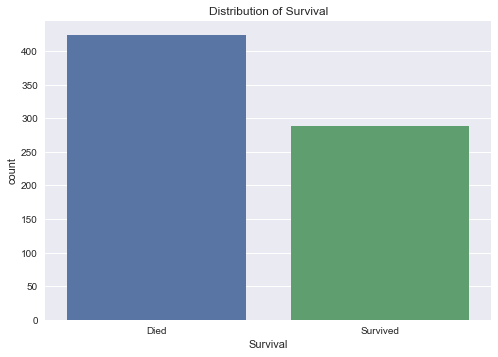

In [9]:
#I am using seaborn.countplot() to count and show the distribution of a single variable
sns.set(style="darkgrid")

ax = sns.countplot(x="Survival", data=titanic_cleaned)
plt.title("Distribution of Survival")


We see that there were 342 passengers survived the disaster or around 38% of the sample.

Now, we also want to look at the distribution of some of other data including gender, socioeconomic class, age, and fare price. Gender, socioeconomic class, age are all categorical data, and barplot is best suited to show their count distribution. Fare price is a continuous variable, and a frequency distribution plot is used to study it. 

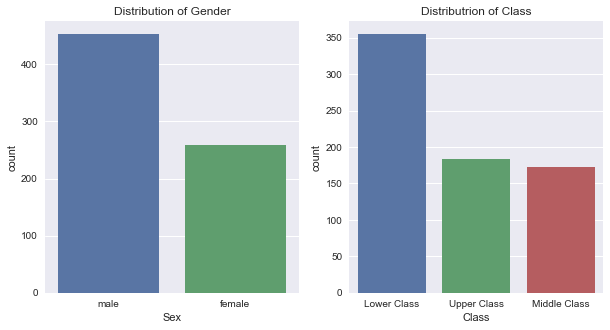

In [10]:
#plt.figure() allows me to specify the size of the graph. 
#using fig.add_subplot allows me to display two subplots side by side
fig = plt.figure(figsize=(10,5)) 

ax1 = fig.add_subplot(121)
ax1=sns.countplot(x="Sex", data=titanic_cleaned)
plt.title("Distribution of Gender")

fig.add_subplot(122)
ax2 = sns.countplot(x="Class", data=titanic_cleaned)
plt.title('Distributrion of Class')

It is now a good idea to combine the two graph to see how is gender and socioeconomic class intertwined. We see that among men, there is a much higher number of lower socioeconomic class individuals compared to women. For middle and upper class, the number of men and women are very similar. It is likely that families made up of the majority middle and upper-class passengers, while the lower class passengers are mostly single men.  



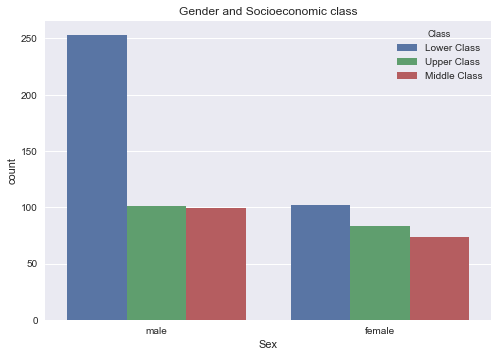

In [11]:
#By using hue argument, we can study the another variable, combine with our original variable
sns.countplot(x='Sex', hue='Class', data=titanic_cleaned)
plt.title('Gender and Socioeconomic class')

Fare price is a continuous variable, and for this type of variable, we use seaborn.distplot() to study its frequency distribution. 

In comparison, age is a discrete variable and can be plotted by seaborn.countplot() which plots a bar plot that shows the counts.

We align the two plots horizontal using add_subplot to better demonstrate this difference.

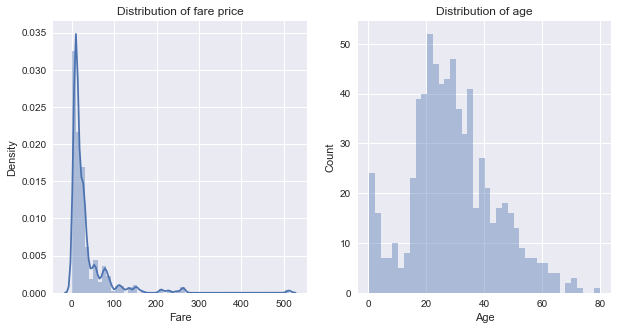

In [12]:
#Use fig to store plot dimension
#use add_subplot to display two plots side by side
fig = plt.figure(figsize=(10,5)) 

ax1 = fig.add_subplot(121)
sns.distplot(titanic_cleaned.Fare)
plt.title('Distribution of fare price')
plt.ylabel('Density')

#for this plot, kde must be explicitly turn off for the y axis to counts instead of frequency density
axe2=fig.add_subplot(122)
sns.distplot(titanic_cleaned.Age,bins=40,hist=True, kde=False)
plt.title('Distribution of age')
plt.ylabel('Count')

We can see that the shape of two plots is quite different. 
* The fare price distribution plot shows a positively skewed curve, as most of the prices are concentrated below 30 dollars, and highest prices are well over 500 dollars
* The age distribution plot demonstrates more of a bell-shaped curve (Gaussian distribution) with a slight mode for infants and young children. I suspect the slight spike for infants and young children to due to the presence of young families.

### Observations on the dataset
---
1. 342 passengers or roughly 38% of total survived.
2. There were significantly more men than women on board.
3. There are significantly higher numbers of lower class passengers compared to the mid and upper class.
4. The majority of fares sold are below 30 dollars, however, the upper price range of fare is very high, the most expensive ones are over 500 dollars, which should be considered outliers. 

### Hypothesis
---
Based on the overview of the data, I formulated 3 potential features that may have influenced the survival.
1. Fare price: What is the effect of fare price on survival rate? Are passengers who could afford more expensive tickets more likely to survive?
2. Gender: Does gender plays a role in survival? Are women more likely to survive than men?
3. Age: What age groups of the passengers are more likely to survive? 


### Fare Price and survival 
---
Let's investigate fare price a bit deeper. First I am interested in looking at its relationship with socioeconomic class. Considering the large range of fare price, we use boxplot to better demonstrate the spread and confidence intervals of the data. The strip plot is used to show the density of data points, and more importantly the outliers.

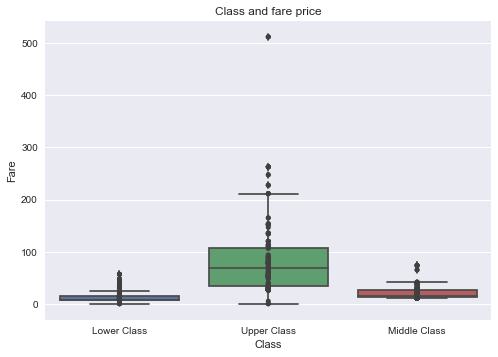

In [13]:
#multiple plots can be overlayed. Boxplot() and striplot() turned out to be a good combination
sns.boxplot(x="Class", y="Fare", data=titanic_cleaned)
sns.stripplot(x="Class", y="Fare", data=titanic_cleaned, color=".25")
plt.title('Class and fare price')

This is not surprising that the outliers existed exclusively in the high socioeconomic class group, as only the wealthy individuals can afford the higher fare price. 

This is clear that the upper class were able to afford more expensive fares, with highest fares above 500 dollars.
To look at the survival rate, I break down the fare data into two groups:
1. Passengers with fare <=35 dollars
2. passengers with fare >35 dollars

In [14]:
#make a copy of the dataset and named it titanic_fare
#copy is used instead of assigning is to perserve the dataset in case anything goes wrong
#add a new column stating whether the fare >35 (value=1) or <=35 dollars (value=0)

titanic_fare = titanic_cleaned.copy()
titanic_fare['Fare>35'] = np.where(titanic_cleaned['Fare']>35,'Yes','No')

#check to see if the column creation is succesful
titanic_fare.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survival,Class,Fare>35
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Died,Lower Class,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Survived,Upper Class,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Survived,Lower Class,No
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Survived,Upper Class,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Died,Lower Class,No


In [15]:
#Calculate the survival rate for passenger who holds fare > $35. 
#float() was used to forced a decimal result due to the limitation of python 2

high_fare_survival=titanic_fare.loc[(titanic_fare['Survived'] == 1)&(titanic_fare['Fare>35']=='Yes')]

high_fare_holder=titanic_fare.loc[(titanic_fare['Fare>35']=='Yes')]

high_fare_survival_rate=len(high_fare_survival)/float(len(high_fare_holder))

print high_fare_survival_rate

0.641176470588


In [16]:
#Calculate the survival rate for passenger who holds fare <= $35. 

low_fare_survival=titanic_fare.loc[(titanic_fare['Survived'] == 1)&(titanic_fare['Fare>35']=='No')]

low_fare_holder=titanic_fare.loc[(titanic_fare['Fare>35']=='No')]

low_fare_survival_rate=len(low_fare_survival)/float(len(low_fare_holder))

print low_fare_survival_rate

0.330258302583


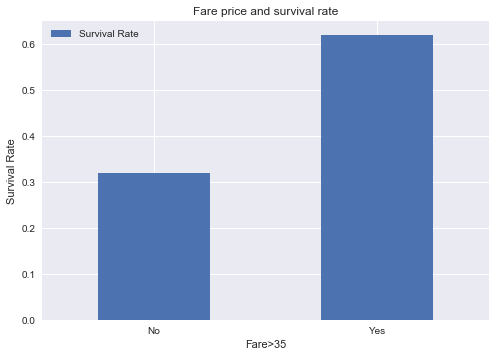

In [17]:
#plot a barplot for survival rate for fare price > $35 and <= $35

fare_survival_table=pd.DataFrame({'Fare Price':pd.Categorical(['No','Yes']),
                                 'Survival Rate':pd.Series([0.32,0.62], dtype='float64')
                                 })
bar=fare_survival_table.plot(kind='bar', x='Fare Price', rot=0)
plt.ylabel('Survival Rate')
plt.xlabel('Fare>35')
plt.title('Fare price and survival rate')

The bar plot using matplotlib.pyplot does a reasonable job of showing the difference in survival rate between the two groups. 

However with seaborn.barplot(), confidence intervals are directly calculated and displayed. This is an advantage of seaborn library. 

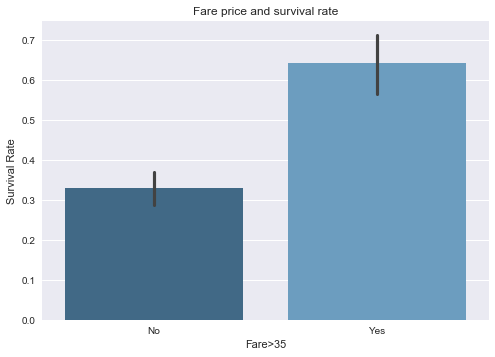

In [18]:
#seaborn.barplot() can directly calculate/display the survival rate and confidence interval from the dataset

sns.barplot(x='Fare>35',y='Survived',data=titanic_fare, palette="Blues_d")
plt.title('Fare price and survival rate')
plt.ylabel('Survival Rate')

As seen from the graph, taking into account of confidence intervals, higher fare group is associated with significantly higher survival rate (~0.62) compared to lower fare group (~0.31). 

How about if we just look at fare price as the continuous variable in relation to survival outcome?

When the Y variable is binary like survival outcome in this case, the statistical analysis suitable is "logistic Regression", where x variable is used as an estimator for the binary outcome of Y variable. 

Fortunately, Seaborn.lmplot() allows us to graph the logistic regression function using fare price as an estimator for survival, the function displays a sigmoid shape and higher fare price is indeed associated with the better chance of survival. 

Note: the area around the line shows the confidence interval of the function.

([<matplotlib.axis.YTick at 0x11527fc10>,
 <a list of 2 Text yticklabel objects>)

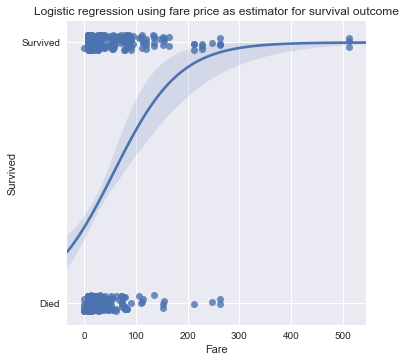

In [19]:
#use seaborn.lmplot to graph the logistic regression function
sns.lmplot(x="Fare", y="Survived", data=titanic_fare,
           logistic=True, y_jitter=.03)
plt.title('Logistic regression using fare price as estimator for survival outcome')
plt.yticks([0, 1], ['Died', 'Survived'])

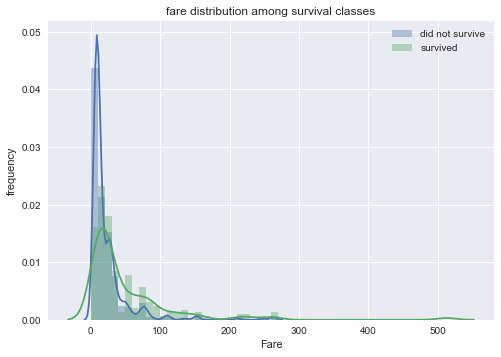

In [35]:
fare_bins = np.arange(0,500,10)
sns.distplot(titanic_cleaned.loc[(titanic_cleaned['Survived']==0) & (titanic_cleaned['Fare']),'Fare'], bins=fare_bins)
sns.distplot(titanic_cleaned.loc[(titanic_cleaned['Survived']==1) & (titanic_cleaned['Fare']),'Fare'], bins=fare_bins)
plt.title('fare distribution among survival classes')
plt.ylabel('frequency')
plt.legend(['did not survive', 'survived']);

The fare distribution between survivors and non-survivors shows that there is peak in mortality for low fare price. 


### Gender and Survival 
---
For this section, I am interested in investigation gender and survival rate. I will first calculate the survival rate for both female and male. Then plot a few graphs to visualize the relationship between gender and survival, and combine with other factors such as fare price and socioeconomic class. 

In [ ]:
#Calculate the survival rate for female
female_survived=titanic_fare.loc[(titanic_cleaned['Survived'] == 1)&(titanic_cleaned['Sex']=='female')]

female_total=titanic_fare.loc[(titanic_cleaned['Sex']=='female')]

female_survival_rate=len(female_survived)/(len(female_total)*1.00)

print female_survival_rate

In [ ]:
#Calculate the survival rate for male
male_survived=titanic_fare.loc[(titanic_cleaned['Survived'] == 1)&(titanic_cleaned['Sex']=='male')]

male_total=titanic_fare.loc[(titanic_cleaned['Sex']=='male')]

male_survival_rate=len(male_survived)/(len(male_total)*1.00)

print male_survival_rate

In [ ]:
#plot a barplot for survival rate for female and male
#we can see that seaborn.barplot 
sns.barplot(x='Sex',y='Survived',data=titanic_fare)
plt.title('Gender and survival rate')
plt.ylabel('Survival Rate')

In [ ]:
##plot a barplot for survival rate for female and male, combine with fare price group
sns.barplot(x='Sex',y='Survived', hue='Fare>35',data=titanic_fare)
plt.title('Gender and survival rate')
plt.ylabel('Survival Rate')

In [ ]:
#plot a barplot for survival rate for female and male, combine with socioeconomic class
sns.barplot(x='Sex',y='Survived', hue='Class',data=titanic_fare)
plt.title('Socioeconomic class and survival rate')
plt.ylabel('Survival Rate')

Therefore, being a female is associated with significantly higher survival rate compared to male. 

In addition, being in the higher socioeconomic group and higher fare group are associated with a higher survival rate in both male and female. 

The difference is that in the male the survival rates are similar for class 2 and 3 with class 1 being much higher, while in the female the survival rates are similar for class 1 and 2 with class 3 being much lower.

### Age and Survival
---

To study the relationship between age and survival rate. First, I seperate age into 6 groups number from 1 to 6:
    1. newborn to 10 years old 
    2. 10 to 20 years old 
    3. 20 to 30 years old 
    4. 30 to 40 years old 
    5. 40 to 50 years old
    6. over 50 years old 
Then, I added the age group number as a new column to the dataset. 

In [ ]:
#create a age_group function
def age_group(age):
    age_group=0
    if age<10:
        age_group=1
    elif age <20:
        age_group=2
    elif age <30:
        age_group=3
    elif age <40:
        age_group=4
    elif age <50:
        age_group=5
    else:
        age_group=6
    return age_group

#create a series of age group number by applying the age_group function to age column
ageGroup_column = titanic_fare['Age'].apply(age_group)

#make a copy of titanic_fare and name it titanic_age
titanic_age=titanic_fare.copy()

#add age group column
titanic_age['Age Group'] = ageGroup_column

#check to see if age group column was added properly
titanic_age.head()

Now, we want to plot a bar graph showing the relationship between age group and survival rate. Age group is used here instead of age because visually age group is easier to observe than using age variable when dealing with survival rate. 

In [ ]:
#Seaborn.barplot is used to plot a bargraph and confidence intervals for survival rate
sns.barplot(x='Age Group', y='Survived',data=titanic_age)
plt.title('Age group and survival rate')
plt.ylabel('Survival Rate')

- Age Group 1: < 10
- Age Group 2: >= 10 and < 20 
- Age Group 3: >= 20 and < 30
- Age Group 4: >= 30 and < 40
- Age Group 5: >= 40 and < 50
- Age Group 6: >= 50  

In [ ]:
#draw bargram and bring additional factors including gender and class
fig = plt.figure(figsize=(10,5)) 

ax1 = fig.add_subplot(121)
sns.barplot(x='Age Group', y='Survived', hue='Sex',data=titanic_age)
plt.title('Age group, gender and survival rate')
plt.ylabel('Survival Rate')

ax1 = fig.add_subplot(122)
sns.barplot(x='Age Group', y='Survived',hue='Pclass',data=titanic_age)
plt.title('Age group, class and survival rate')
plt.ylabel('Survival Rate')

- Age Group 1: < 10
- Age Group 2: >= 10 and < 20 
- Age Group 3: >= 20 and < 30
- Age Group 4: >= 30 and < 40
- Age Group 5: >= 40 and < 50
- Age Group 6: >= 50  


The bar graphs demonstrate that only age group 1 (infants/young children) is associated with significantly higher survival rate. There are no clear distinctions on survival rate between the rest of age groups.

How about using age instead of age group. Is there a linear relationship between age and survival outcome? By using seaborn.lmplot(), We can perform a logistic regression on survival outcome using age as an estimator. Let's take a look. 

In [ ]:
#use seaborn.lmplot to graph the logistic regression function
sns.lmplot(x="Age", y="Survived", data=titanic_age,
           logistic=True, y_jitter=.03)
plt.title('Logistic regression using age as the estimator for survival outcome')
plt.yticks([0, 1], ['Died', 'Survived'])

From the graph, we can see there is a negative linear relationship between age and survival outcome.

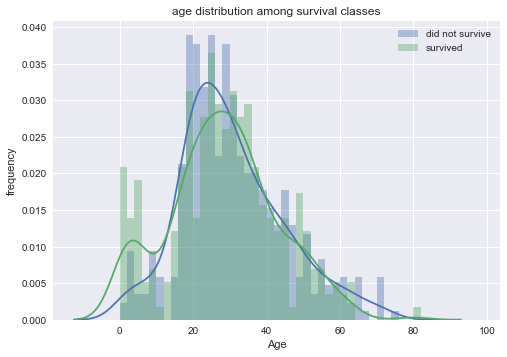

In [39]:
fare_bins = np.arange(0,100,2)
sns.distplot(titanic_cleaned.loc[(titanic_cleaned['Survived']==0) & (titanic_cleaned['Age']),'Age'], bins=fare_bins)
sns.distplot(titanic_cleaned.loc[(titanic_cleaned['Survived']==1) & (titanic_cleaned['Age']),'Age'], bins=fare_bins)
plt.title('age distribution among survival classes')
plt.ylabel('frequency')
plt.legend(['did not survive', 'survived']);

The age distribution comparison between survivors and non-survivors confirmed the survival spike in young children. 

### Limitations 
---
There are limitations on our analysis:
1. Missing values: due to too much missing values(688) for the cabin. I decided to remove this column from my analysis. However, the 178 missing values for age data posed problems for us. In my analysis, I decided to drop the missing values because I felt we still had a reasonable sample size of >700, but selection bias definitely increased as the sample size decreased. Another option could be using the mean of existing age data to fill in for the missing values, this approach could be a good option if we had lots of missing value and still wants to incorporate age variable into our analysis. In this case, bias also increases as we are making assumptions for the passengers with missing age.

2. Survival bias: the data was partially collected from survivors of the disaster, and there could be a lot of data that were missing for people who did not survive. This leads the dataset becomes more representative toward the survivors. This limitation is difficult to overcome, as data we have today is the best of what we could gather due to the disaster has been happened over 100 years ago. 

3. Outliers: for the fare price analysis, we saw that the fare prices had a large difference between mean(34.57) and median(15.65). The highest fares were well over 500 dollars. As a result, the distribution of our fare prices distribution is very positive skewed. This can affect the validity and the accuracy of our analysis. However, because I really wanted to see the survival outcome for the wealthier individuals, I decided to incorporate those outliers into my analysis. An alternative approach is to drop the outliers (e.g. fare prices >500) from our analysis, especially if we are only interested in studying the majority of the sample. 

In [ ]:
# using the apply function and lambda to count missing values for each column

print titanic_original.apply(lambda x: sum(x.isnull().values), axis = 0) 

The table shows the number of missing data in the data set, which is an important factor when considering the limitations of the analysis.

### Conclusion
---
In conclusion, the dataset on Titanic's 891 passengers provided valuable insights for us. Through data analysis and visualizations, we saw that factors such as being in a higher socioeconomic class, higher fare price, being a female, being a young child/infant were all associated with significantly higher survival rate.

However, the missing values, survivor bias, and outliers introduced bias and affected the validity and accuracy of our study. For future studies, if we can incorporate several datasets of disasters that are similar to Titanic into one large dataset, it may allow us to gain additional insights on what features separate survivors and non-survivors, and possibly allow us to make predictions on disaster survival outcomes. 

### References
---

"RMS Titanic", 2017, Wikipedia, from https://en.wikipedia.org/wiki/RMS_Titanic

"Titanic: Machine Learning from Disaster", 2017, Kaggle, from https://www.kaggle.com/c/titanic